## 1) Section 2.1 Cluster analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib  inline

In [2]:
df = pd.read_csv('../data/single_family_home_values.csv') # zillow

In [3]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
df.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


In [6]:
X = df.drop('estimated_value', axis=1)

In [7]:
X = X[["bedrooms", "bathrooms", "rooms", "squareFootage", "lotSize", "yearBuilt", "priorSaleAmount"]]
X.fillna(0, inplace=True)

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [9]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [10]:
labels = kmeans.labels_

In [11]:
kmeans.cluster_centers_[0]

array([2.69631450e+00, 2.25962326e+00, 6.18116298e+00, 1.46661704e+03,
       5.39924226e+03, 1.92559115e+03, 2.89364563e+05])

In [12]:
X['cluster'] = labels

In [13]:
X.groupby('cluster').median()

,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,priorSaleAmount
cluster,,,,,,,
0,3.0,2.0,6.0,1321.0,5220.0,1923.0,275000.0
1,4.0,6.0,10.0,4419.0,8330.0,1990.0,2200000.0
2,3.0,4.0,8.0,2540.0,6250.0,1926.0,645000.0
3,3.0,4.5,9.0,3748.0,8597.5,1998.0,13750055.0
4,2.0,2.0,5.0,1135.0,6240.0,1928.0,0.0


In [14]:
X = X.drop('cluster', axis=1)

In [15]:
for i in range(3, 10):
    kmeans = KMeans(n_clusters=i).fit(X)
    labels = kmeans.labels_
    print(silhouette_score(X, labels))
    #print(kmeans.cluster_centers_)
    

0.6145841760824184
0.6165712383937217
0.6327287795214022
0.6434308700548116
0.6592492983027767
0.6601836653725232
0.6567257200652067


## 2.2 Classification and Regression

In [16]:
y = df.estimated_value

In [17]:
lg = LinearRegression()
lg.fit(X, y) # training
lg.score(X,y)

0.7648477834199695

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
X_train.shape, y_train.shape

((11250, 7), (11250,))

In [20]:
lg = LinearRegression()
lg.fit(X_train, y_train) # training, fit
lg.score(X_test, y_test) # evaluate, score, R2

0.7758724587428161

In [21]:
df['estimated_value_bins']=df.estimated_value.apply(lambda x: 'high' if x>500000 else 'low')

In [22]:
df.estimated_value_bins.value_counts()

high    7963
low     7037
Name: estimated_value_bins, dtype: int64

In [23]:
y2 = df.estimated_value_bins

In [24]:
log = LogisticRegression()

In [25]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2)
log.fit(X_train, y2_train)
log.score(X_test,y2_test)

0.8170666666666667

In [26]:
y_pred = log.predict(X_test)

In [27]:
np.array(y2_test)

array(['high', 'high', 'low', ..., 'high', 'high', 'high'], dtype=object)

In [28]:
confusion_matrix(y2_test, y_pred)

array([[1578,  397],
       [ 289, 1486]])

In [29]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)
# not so great

-0.050442696306427504

In [30]:
svc = SVC()
svc.fit(X_train, y2_train)
svc.score(X_test, y2_test)

0.7064

In [31]:
y2_pred = svc.predict(X_test)

In [32]:
confusion_matrix(y2_test, y2_pred)

array([[1021,  954],
       [ 147, 1628]])

In [33]:
## KNN:

In [34]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

-0.17643989928277803

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y2_train)
knn.score(X_test, y2_test)

0.8285333333333333

In [36]:
y2_pred=knn.predict(X_test)

In [37]:
confusion_matrix(y2_test, y2_pred)

array([[1622,  353],
       [ 290, 1485]])

## Section 2.3 Assosiation and correlation

<AxesSubplot:>

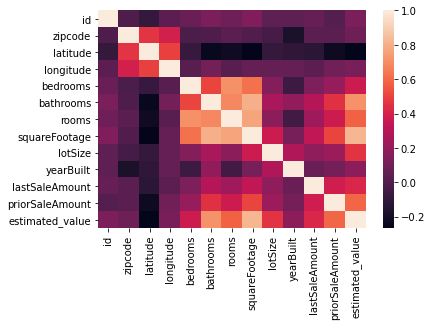

In [38]:
sns.heatmap(df.corr())

In [39]:
df.cov()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
id,3.832695e+15,-4.794798e+06,-134755.796294,97277.793396,4.241855e+06,9.277448e+06,1.140562e+07,7.357116e+09,8.457335e+09,7.661356e+07,3.326786e+12,2.403030e+11,3.940756e+12
zipcode,-4.794798e+06,9.438634e+01,0.105769,0.152571,-1.605609e-01,-8.546300e-02,5.964580e-01,6.549458e+00,-1.103540e+03,-5.065034e+01,2.479246e+05,1.030079e+05,4.366604e+05
latitude,-1.347558e+05,1.057691e-01,0.000555,0.000468,-1.754563e-03,-6.524595e-03,-9.848155e-03,-5.015548e+00,-6.593470e+00,-7.428908e-02,-2.317704e+03,-1.773170e+03,-3.163364e+03
longitude,9.727779e+04,1.525709e-01,0.000468,0.001583,7.981594e-04,4.991539e-03,2.032934e-03,2.241057e+00,7.941290e+00,7.233661e-02,1.134553e+03,1.306180e+03,2.449320e+03
bedrooms,4.241855e+06,-1.605609e-01,-0.001755,0.000798,8.050231e-01,5.294167e-01,1.251811e+00,4.627877e+02,4.285138e+02,-1.656479e+00,9.398271e+04,6.326439e+04,1.670586e+05
bathrooms,9.277448e+06,-8.546300e-02,-0.006525,0.004992,5.294167e-01,1.360206e+00,1.567688e+00,7.790507e+02,9.104679e+02,6.793260e+00,2.683082e+05,1.783968e+05,4.211742e+05
rooms,1.140562e+07,5.964580e-01,-0.009848,0.002033,1.251811e+00,1.567688e+00,3.836116e+00,1.254643e+03,1.038417e+03,-2.797016e+00,3.502513e+05,2.430849e+05,5.740237e+05
squareFootage,7.357116e+09,6.549458e+00,-5.015548,2.241057,4.627877e+02,7.790507e+02,1.254643e+03,6.899562e+05,9.241945e+05,2.866840e+03,2.154884e+08,1.377630e+08,3.454582e+08
lotSize,8.457335e+09,-1.103540e+03,-6.593470,7.941290,4.285138e+02,9.104679e+02,1.038417e+03,9.241945e+05,9.079853e+06,2.575406e+04,4.521032e+08,1.919438e+08,6.939180e+08
yearBuilt,7.661356e+07,-5.065034e+01,-0.074289,0.072337,-1.656479e+00,6.793260e+00,-2.797016e+00,2.866840e+03,2.575406e+04,8.962271e+02,1.801012e+06,1.141169e+06,2.634072e+06


In [40]:
y = df.estimated_value

In [41]:
X.columns

Index(['bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize',
       'yearBuilt', 'priorSaleAmount'],
      dtype='object')

====
bedrooms
mean: 2.7084
std: 0.897230799854315


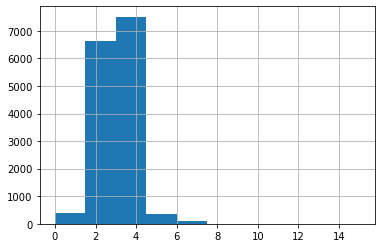

====
bathrooms
mean: 2.1950666666666665
std: 1.1662788442928498


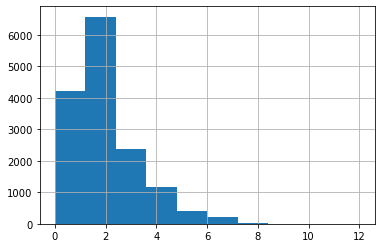

====
rooms
mean: 6.164133333333333
std: 1.9586005182157198


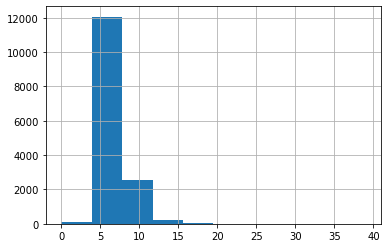

====
squareFootage
mean: 1514.5044
std: 830.6359987331792


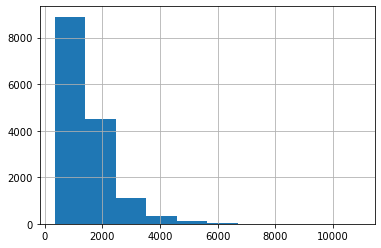

====
lotSize
mean: 5820.7662
std: 3013.2794703692293


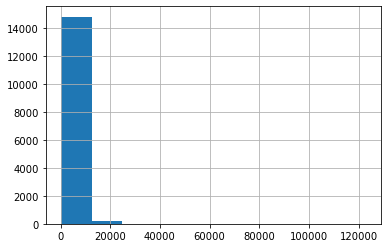

====
yearBuilt
mean: 1929.3885333333333
std: 33.82853430411127


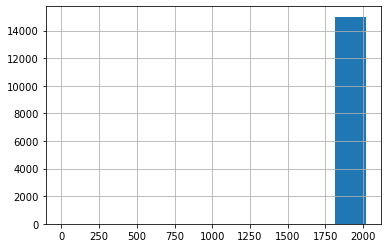

====
priorSaleAmount
mean: 195216.20066666667
std: 313797.9066451837


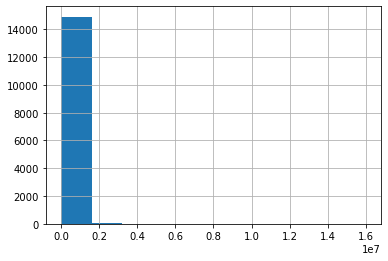

In [42]:
for i in X.columns:
    print("====")
    print(i)
    X.loc[:, i].hist()
    print("mean:", X.loc[:, i].mean())
    print("std:", X.loc[:, i].std())
    plt.show()

<AxesSubplot:>

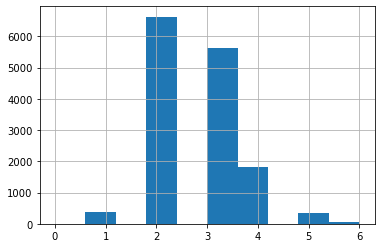

In [43]:
X2 = X[(X.bedrooms<7) & (X.bathrooms<7)] # drop
X2.bedrooms.hist()

In [44]:
# Outliers

# 1. Three Sigma Rule:

# 2. Boxplot Rule:


<AxesSubplot:>

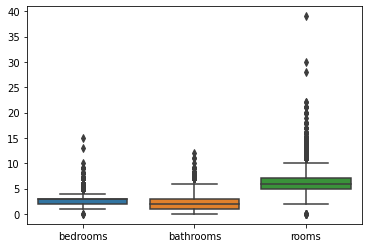

In [45]:
sns.boxplot(data=X[['bedrooms', 'bathrooms', 'rooms']])

<AxesSubplot:>

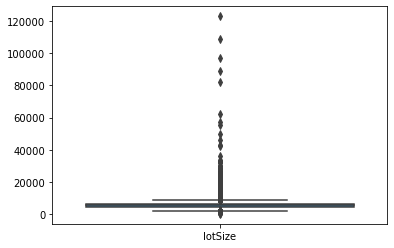

In [46]:
sns.boxplot(data=X[['lotSize']])

In [47]:
#Mahalanobis Rule

In [48]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [49]:
# as column vectors
x = np.random.poisson(5,10)
y = np.random.poisson(5,10)
MahalanobisDist(x,y)

[0.6572343715921052,
 0.3766120459714859,
 0.32005869524378505,
 2.490407424775907,
 1.9962555735162137,
 1.5111959050291188,
 0.8065003050313865,
 0.7975686863036948,
 1.756707514475244,
 0.6930443109022274]

## Section 2.4 Dimensionality reduction
Curse of dimensionality: "As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially"

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(4)

In [52]:
X.shape

(15000, 7)

In [65]:
X_transformed = pca.fit_transform(X)

In [66]:
X_transformed.shape

(15000, 4)

In [67]:
pca.components_[0]

array([4.34835866e-07, 1.39033126e-06, 1.76645671e-06, 9.91884229e-04,
       1.22556479e-03, 8.13159056e-06, 9.99998757e-01])

In [69]:
lg = LinearRegression()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)

ValueError: Found input variables with inconsistent numbers of samples: [15000, 10]

In [75]:
lg.fit(X_train, y_train)

LinearRegression()

In [74]:
lg.score(X_test, y_test)

-0.00039986708353256795